# Logistic Regression
## Name: Nguyen Anh Hoang Phuc

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    def __init__(self, num_iter=100, lr=0.01, C=1, random_state=None, bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.C = C
        self.lamda = 1/self.C 
        self.random_state = random_state

        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    # problem 1    
    def _linear_combination(self, X):
        """
        Compute a linear hypothetical function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
        Training data
        Returns
        -------
        The following form of ndarray, shape (n_samples, 1)
        Estimated result by linear hypothetical function
        """
        x1 = X

        # x0 Create a bias term.
        if self.bias:
            x0 = np.zeros(x1.shape[0])
        else:
            x0 = np.ones(x1.shape[0])
        return np.concatenate([x0.reshape(-1,1),x1],axis=1)

    # problem 1
    def _hypothetical_function(self, X):
        """
        Compute the assumed function of a linear.
        
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        Returns
        -------
        The following form of ndarray, shape (n_samples, 1)
        Estimated result with linear assumed functions.
        """
        x = X 
        z = np.dot(x,self.theta)
        return 1/(1+np.exp(-z))

    def _gradient_descent(self, X, error):
        """
        Using the steepest descent method, the value of $\theta$ is update and learned.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        error: Error between true value and estimated value
        """
        # tmp to add regularization (lamda) to i=1,2,...
        self.tmp = np.append(0, np.ones(X.shape[1]-1))
        self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X) 

    def _loss_function(self, y, yhat):
        """
        Calculate the loss function for logistic regression.
        Parameters
        ----------
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of validation data
        """
        return np.mean(-y*np.log(yhat) - (1-y)*np.log(1-yhat)) + 0.5*self.lamda*np.mean(self.theta[1:]**2)

    def fit(self, X, y, X_val=False, y_val=False):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        # Get the label value of y
        self.ylabel = np.unique(y)

        # Replace the label value of y with 0, 1
        y = np.where(y==self.ylabel[0],0,1)

        if (type(y_val) != bool):
            y_val = np.where(y_val==self.ylabel[0],0,1)

        # Linear combination
        X = self._linear_combination(X)

        # Given the initial value of parameter theta as a random number.
        np.random.seed(self.random_state)
        self.theta = np.random.rand(X.shape[1])

        for i in range(self.iter):
            # Predicted probability
            yhat = self._hypothetical_function(X)

            # measure error
            error = yhat-y
            self.loss[i] = self._loss_function(y,yhat)

            if (type(X_val) != bool):
                val_X = self._linear_combination(X_val)
                val_yhat = self._hypothetical_function(val_X)

                self.val_loss[i] = self._loss_function(y_val, val_yhat)

            self._gradient_descent(X, error)
        
            # Output the learning process when verbos is set to true
            if self.verbose:
                print('n_iter: ',i,', ',
                      'loss: ', self.loss[i],', ',
                      'theta: ', self.theta)
        # save theta
        np.save('theta', self.theta)

    def predict(self, X):
        """
        Estimate the label using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        X = self._linear_combination(X)
        yhat = self._hypothetical_function(X)

        return np.where(yhat<0.5, self.ylabel[0],self.ylabel[1])
    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        X = self._linear_combination(X)
        return self._hypothetical_function(X)

In [3]:
def scratch_train_test_split(X, y, train_size=0.8):
    """Divide the validation data.
    Parameters
    ----------
    X : ndarray
      Training data (n_samples, n_features)
    y : ndarray
      Correct answer value (n_samples,)
    train_size : float
      Specify what percentage to use as a train (0 < train_size < 1)
    Returns
    -------
    X_train : ndarray
      Training data (n_samples, n_features)
    X_test : ndarray
      Validation data (n_samples, n_features)
    y_train : ndarray
      Correct answer value of training data (n_samples,)
    y_test : ndarray
      Correct value of verification data (n_samples,)
    """
    # Write code here
    if train_size<=0 or train_size >= 1:
         raise ValueError('train_size={0} should be a float in the '
                         '(0, 1) range'.format(train_size))
    train_size = int(train_size*X.shape[0])
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    split = np.split(X, [train_size])
    X_train = split[0]
    X_test = split[1]
    split = np.split(y, [train_size])
    y_train = split[0]
    y_test = split[1]
    return X_train, X_test, y_train, y_test

## Problem 1 Hypothetical function

Please implement the method of logistic regression assumption function in ScratchLogisticRegression class.

The assumed function for logistic regression is the assumed function for linear regression passed through the Sigmoid function. The sigmoid function is represented by the following equation

$g(z)=\frac{1}{1+e} \cdot-z$

The linear regression hypothesis function was:

$h_{\theta}(x)=\theta^{T} \cdot x$

Put together, the logistic regression assumption function is

$h_{\theta}(x)=\frac{1}{1+e^{-} \cdot \theta^{T} \cdot x}$

$x$: Feature vector

$\theta$: Parameter (weight) vector

In [4]:
# hypothetical function thetax
x1 = np.arange(1,11,1).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1], axis=1)
print('x: \n',x)

x: 
 [[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


In [5]:
# parameter theta
theta = np.random.randn(x.shape[1])
print('theta:\n', theta)

theta:
 [-1.0591306  -0.17516616]


In [6]:
# linear combination
z = np.dot(x,theta)
print('z:\n',z)

z:
 [-1.23429676 -1.40946292 -1.58462908 -1.75979524 -1.93496139 -2.11012755
 -2.28529371 -2.46045987 -2.63562603 -2.81079218]


In [7]:
# Assign x to the sigmoid functrion ---output 0<y<1
y = 1/(1+np.exp(-z))
print('y:\n',y)

y:
 [0.22543028 0.19631878 0.17014089 0.14681599 0.12620245 0.10811637
 0.09234828 0.078677   0.06688049 0.05674377]


In [8]:
# try it
z1 = np.arange(-50,50,0.1)
y1 = 1/(1+np.exp(-z1))

[]

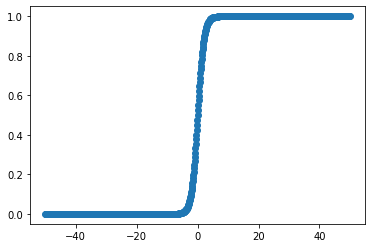

In [9]:
plt.scatter(z1,y1)
plt.plot()

## Problem 2 Steepest descent

Implement the steepest descent method for training. Add a method _gradient_descent that updates the parameters as in the following equation, and
Please it call from the fit method.

$\theta_{j}:=\theta_{j}-\alpha \frac{\partial J(\theta)}{\partial \theta_{j}}$

$\frac{\partial J(\theta)}{\partial \theta_{0}}=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}, j=0$

$\frac{\partial J(\theta)}{\partial \theta_{j}}=\left(\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right)+\frac{\lambda}{m} \theta_{j} \quad, j \geq 1$

$\alpha$: learning rate

$i$: sample index

$j$: Feature index

$m$: Number of input data

$h_\theta()$: Assumption function

$x$: Feature vector

$\theta$: Parameter (weight) vector

$x^{(i)}$: Feature vector of the i-th sample

$y^{(i)}$: Correct answer label of i-th sample

$\theta_j$: jth parameter (weight)

$λ$: Regularization parameter

The above formula contains a regularization term. Regularization terms are used to prevent overfitting. The intercept $\theta_0$ is not included in the regularization term so that the coefficients for features, excluding the intercept, can be discussed from the same perspective.

In [10]:
# Pre-implementation check for parameter update Predictive value label conversion
x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x0 = np.ones(x1.shape[0])
x = np.concatenate([x0.reshape(-1,1),x1],axis=1)

y = np.array([0.4,0.5,0.2,0.1,0.9])
yhat = np.where(y<0.5,0,1)
y_test = np.array([1,1,0,0,1])
print('x:\n',x)
print('y:\n',y)
print('yhat:\n',yhat)
print('ytest:\n',y_test)

x:
 [[1. 2.]
 [1. 1.]
 [1. 5.]
 [1. 6.]
 [1. 4.]]
y:
 [0.4 0.5 0.2 0.1 0.9]
yhat:
 [0 1 0 0 1]
ytest:
 [1 1 0 0 1]


In [11]:
# Parameter theta
theta = np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [-0.93876252  1.48822077]


In [12]:
# Error of yhat,y
error = yhat - y_test 
print('error:\n',error)

error:
 [-1  0  0  0  0]


In [13]:
# lamda
lm = np.array([0,1])
theta*lm 

array([-0.        ,  1.48822077])

In [14]:
# Update parameters
0.01*np.dot(error,x)/len(x) + theta*lm/len(x)

array([-0.002     ,  0.29364415])

In [15]:
theta -= (0.01*np.dot(error,x)/len(x) + theta*lm/len(x))
print('theta:\n',theta)

theta:
 [-0.93676252  1.19457661]


In [16]:
theta -= (0.01*np.mean(np.dot(error,x)) + theta*lm/len(x))
print('theta:\n',theta)

theta:
 [-0.92176252  0.97066129]


## Problem 3 Estimated

Please implement the estimation mechanism. Add to the predict method and predict_proba method included in the template of ScratchLogisticRegression class.

The output of the hypothetical function $h_\theta(x)$ is the return value of predict_proba, and the value is labeled as 1 and 0 with a threshold value, which is the return value of predict.

In [17]:
x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x2 = np.array([2,1,5,1,4]).reshape(-1,1)
y = np.array([1,0,0,0,1])
print('x1:\n',x1)
print('x2:\n',x2)
print('y:\n',y)

x1:
 [[2]
 [1]
 [5]
 [6]
 [4]]
x2:
 [[2]
 [1]
 [5]
 [1]
 [4]]
y:
 [1 0 0 0 1]


In [18]:
clf = ScratchLogisticRegression()
clf.fit(x1,y,x1,y)

y_proba = clf.predict_proba(x2)
y_pred = clf.predict(x2)

In [19]:
print('y_proba:\n',y_proba)
print('y_pred:\n',y_pred)

y_proba:
 [0.52750492 0.5958562  0.32647705 0.5958562  0.39029683]
y_pred:
 [1 1 0 1 0]


## Problem 4 Objective function

Implement the Objective function (loss function) of the logistic regression expressed in the following formula And make sure that this is recorded inself.loss, self.val_loss .

Note that this formula contains a regularization term.

*If you cannot see the formula, please see DIVER full screen.

 $J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left[-y^{(i)} \log \left(h_{\theta}\left(x^{(i)}\right)\right)-\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]$

$m$: Number of input data

$h_\theta()$: Assumption function

$x$: Feature vector

$\theta$: Parameter (weight) vector

$x^{(i)}$: Feature vector of the i-th sample

$y^{(i)}$: Correct answer label of i-th sample

$\theta_j$: jth parameter (weight)

$n$: Number of features

$λ$: Regularization parameter

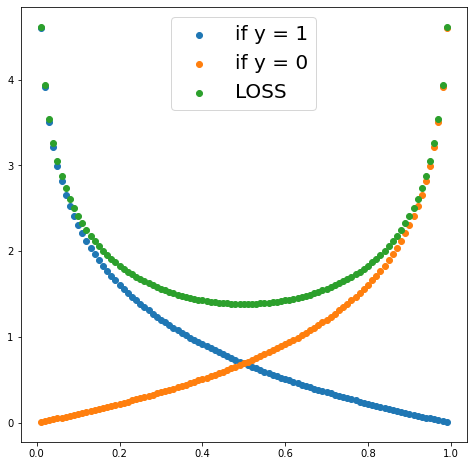

In [20]:
# Check data creation
y1 = np.ones(99)
y2 = np.zeros(99)
yh = np.arange(0.01,1.0,0.01)

# Try to imagine the objective function J with check data.
J1 = -y1*np.log(yh)-(1-y1)*np.log(1-yh)
J2 = -y2*np.log(yh)-(1-y2)*np.log(1-yh)
J = -y1*np.log(yh)-(1-y2)*np.log(1-yh)

# Plotting the Learning Curve
fig,ax = plt.subplots(figsize=(8,8))

plt.rcParams["font.size"] = 20
plt.scatter(yh,J1,label='if y = 1')
plt.scatter(yh,J2,label='if y = 0')
plt.scatter(yh,J,label='LOSS')
plt.legend()

## Problem 5 Learning and estimation

Learn and estimate the scratch implementation for the binary classification of virgicolor and virginica in the iris data set provided in the Introduction to Scratch Machine Learning Sprint.

Compare this with the scikit-learn implementation and see if it works correctly.

Use scikit-learn for indicator values such as Accuracy, Precision and Recall.

In [21]:
from sklearn.datasets import load_iris
data = load_iris().data 
target = load_iris().target.reshape(-1,1)

In [22]:
iris = np.concatenate([data, target], axis=1)
iris = pd.DataFrame(iris)
iris.shape

(150, 5)

In [23]:
disp = False 
if disp == True:
    sns.partplot(iris, palete='tab10');


In [24]:
iris_X = iris.loc[iris[4]!=0,2:3].values 
iris_y = iris.loc[iris[4]!=0,4].values
print('iris_X.shape: ', iris_X.shape)
print('iris_y.shape: ', iris_y.shape)

iris_X.shape:  (100, 2)
iris_y.shape:  (100,)


In [25]:
# Train and estimate on Iris dataset
from sklearn.model_selection import train_test_split
X = iris_X
y = iris_y

X_train, X_valid, y_train, y_valid = scratch_train_test_split(X, y)

print('X_train.shape: ',X_train.shape)
print('y_train.shape: ',y_train.shape)
print('X_valid.shape: ',X_valid.shape)
print('y_valid.shape: ',y_valid.shape)

X_train.shape:  (80, 2)
y_train.shape:  (80,)
X_valid.shape:  (20, 2)
y_valid.shape:  (20,)


In [26]:
# Unique value of y
np.unique(y)

array([1., 2.])

In [27]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [28]:
clf = ScratchLogisticRegression(num_iter=500, lr=0.01, C=0.01, verbose=False)
clf.fit(X_train_std,y_train,X_valid_std,y_valid)

y_pred = clf.predict(X_valid_std)
y_prob = clf.predict_proba(X_valid_std)

In [29]:
y_valid

array([2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1.,
       1., 2., 1.])

In [30]:
y_pred

array([2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1.,
       1., 2., 1.])

In [31]:
# Evaluation index
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)

accuracy:  0.95
precision:  1.0
recall:  0.875
f1:  0.9333333333333333


In [32]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression()

clf2.fit(X_train_std,y_train)

y_pred2 = clf2.predict(X_valid_std)
y_prob2 = clf2.predict_proba(X_valid_std)[:,1]

In [33]:
y_pred2

array([2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1.,
       1., 2., 1.])

In [34]:
y_prob2

array([9.10815833e-01, 4.79910084e-04, 9.91620324e-01, 4.02035866e-01,
       1.55904580e-02, 8.24655778e-01, 1.55904580e-02, 9.89434865e-01,
       7.85139155e-01, 5.22313084e-01, 9.81980357e-01, 6.35810123e-01,
       3.26615787e-02, 9.95978925e-01, 5.75635023e-01, 9.65544243e-01,
       1.55904580e-02, 5.29672606e-02, 9.98177982e-01, 1.04154332e-03])

In [35]:
accuracy = accuracy_score(y_valid, y_pred2)
precision = precision_score(y_valid, y_pred2)
recall = recall_score(y_valid, y_pred2)
f1 = f1_score(y_valid, y_pred2)

print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)

accuracy:  0.9
precision:  0.875
recall:  0.875
f1:  0.875


## Problem 6 Plot of learning curve

Look at the learning curve to see if the losses are falling properly.

[]

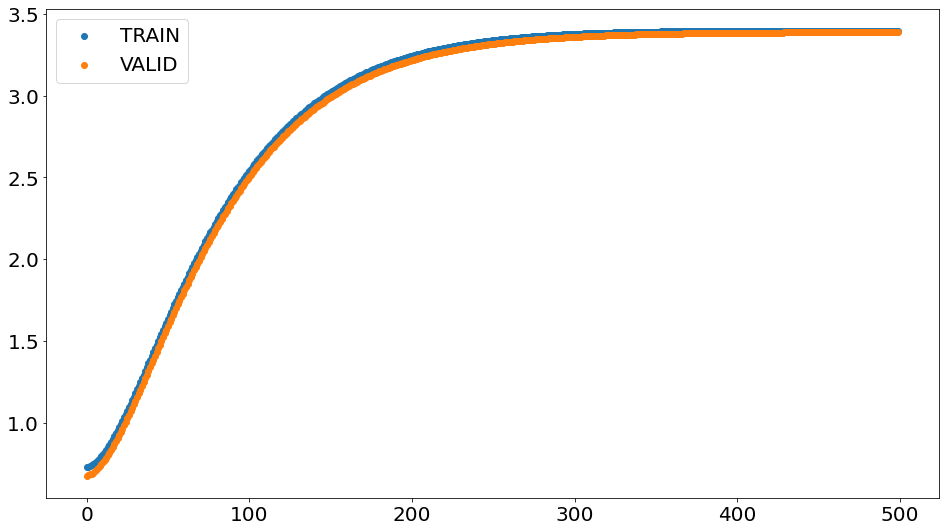

In [36]:
# Plotting the Learning Curve
fig, ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(clf.loss)), clf.loss, label="TRAIN")
plt.scatter(range(len(clf.val_loss)), clf.val_loss, label="VALID")
plt.legend()
plt.plot()

## Problem 7 Visualization of decision area

Visualise the decision area.

In [37]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,title='decision region',xlabel='xlabel',ylabel='ylabel',target_names=['versicolor','virginica']):
    #setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    #pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    #plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0,mesh_f1,y_pred,n_class-1,cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0,mesh_f1,y_pred,n_class-1,colors='y', linewidths=3,alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:,0], X[y==target][:,1],s=80,color=scatter_color[i],label=target_names[i],marker='o')
    patches = [mpatches.Patch(color=scatter_color[i],label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

<li> Classification with scratch-implemented models

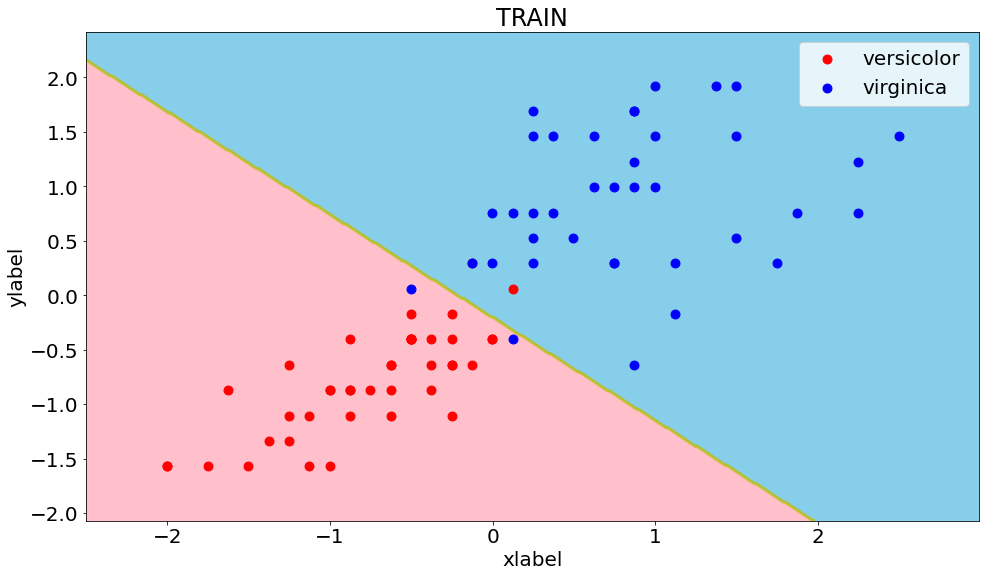

In [38]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf,title='TRAIN')

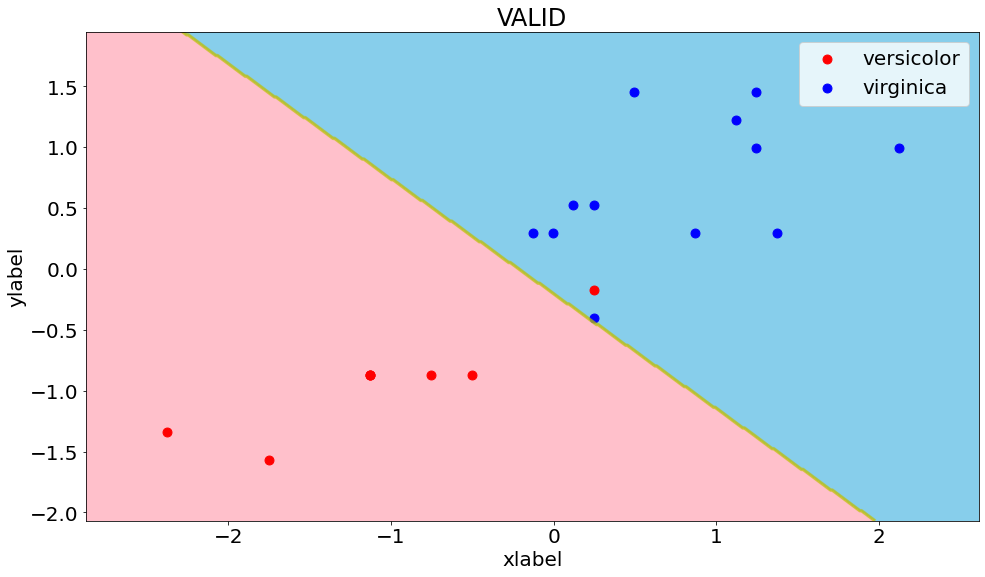

In [39]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf,title='VALID')

<li> Classification by logistic regression in sklearn

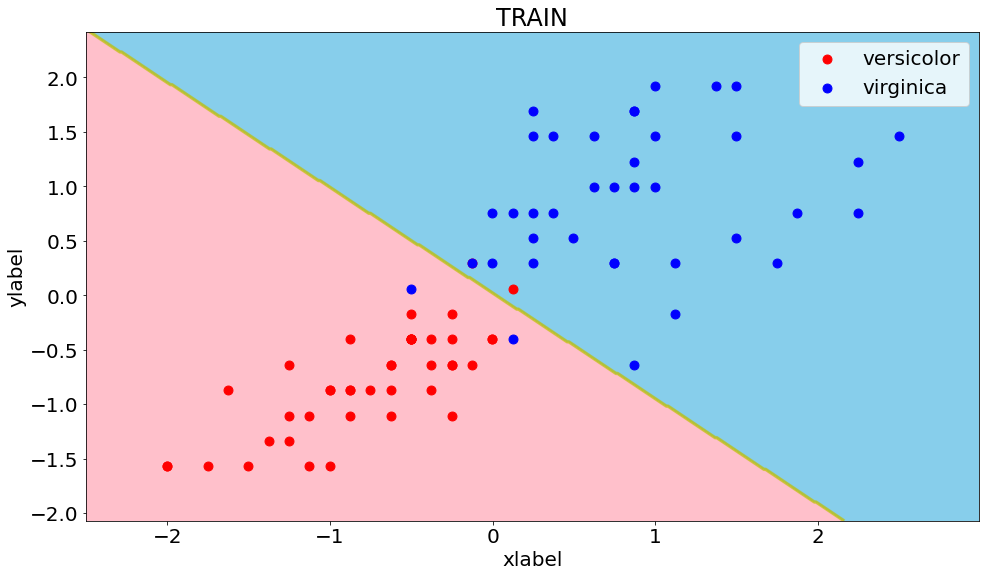

In [40]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf2,title='TRAIN')

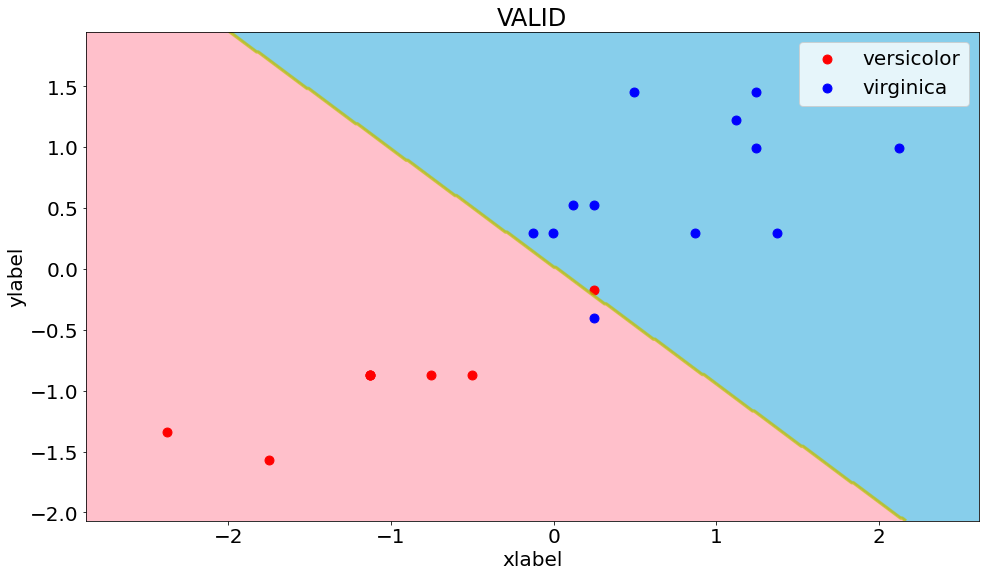

In [41]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf2,title='VALID')

## Problem 8 (Advance assignment) Saving weights

Let's save and load the learned weights for easy verification. Use the pickle module and NumPy's np.savez.

In [42]:
# Save learned theta in 'theta.npy' (in function)
# Call the learned theta
np.load('theta.npy')

array([0.04934862, 0.2325948 , 0.24628831])